In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.fft import fftfreq
from astropy.timeseries import LombScargle
import scipy
%matplotlib inline

# Creating a signal

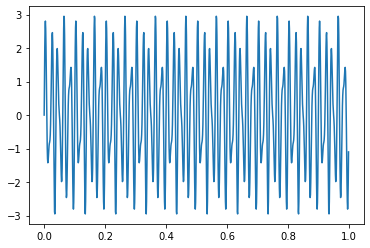

In [72]:
t = np.arange(0,1,0.001)                                         #(start,stop,sampling space)
y = 2*np.sin(2*np.pi*50*t) + np.sin(80*2.0*np.pi*t)              # signal
plt.plot(t,y)

# Discrete fourier transform

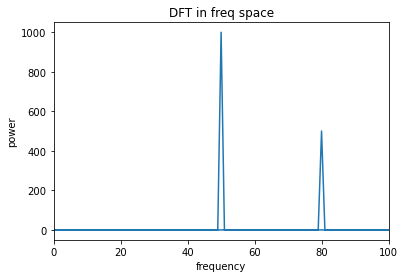

(0.0, 0.1)

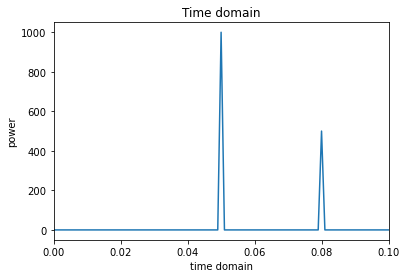

In [73]:
#DFT in frequency space

from scipy.fft import fftfreq

ft = fft(y)
xf = fftfreq(1000, 0.001)   #fftfreq(no. of sample points = 1000, sampling space = 0.001) 

plt.xlim(0,100)
plt.title("DFT in freq space")
plt.plot(xf,np.abs(ft))
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()

plt.title("Time domain")
plt.plot(t,np.abs(ft))
plt.xlabel("time domain")
plt.ylabel("power")
plt.xlim(0,0.1)


# Lomb Scargle

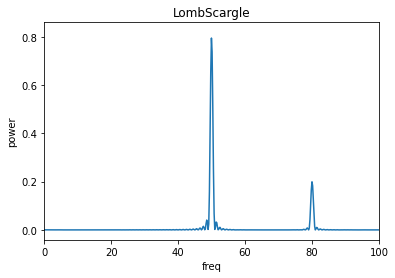

In [74]:
frequency, power = LombScargle(t, y).autopower()
#freq = frequency[np.argmax(power)]
#print(freq)
plt.title("LombScargle")
plt.xlim(0,100)
plt.plot(frequency,power)
plt.xlabel("freq")
plt.ylabel("power")
plt.show()

# Variations

In [75]:
# add noise(random) to signal and apply both FT and LS
# same freq, diff amp (FT and LS)
# diff freq, same amp (FT and LS)
# create uneven sample and do FT and LS (either use random or remove some part of waves)
# form gaussian and add sine wave nad then apply both FT and LS

# 1) add noise(random) to signal and apply both FT and LS

In [76]:
noise = np.random.normal(0,3,1000)
#print(noise)


# with 100 (second value) no peak visible in LS --- kinda shifted towards left
# with 10 only higher amp frequency visible in LS ---- various other peaks
# with 5 :- freq 50 has clear peak but bot freq 80
# with 3 and below its the best

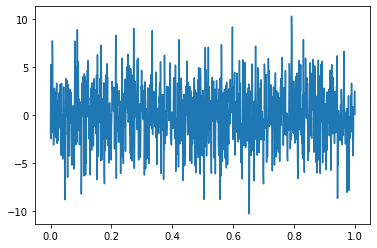

In [77]:
plt.plot(t,noise)     #noise

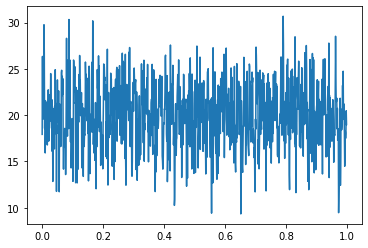

In [79]:
signal = y + noise
#print(signal)

plt.plot(t,np.array(signal)+20)    #signal with noise

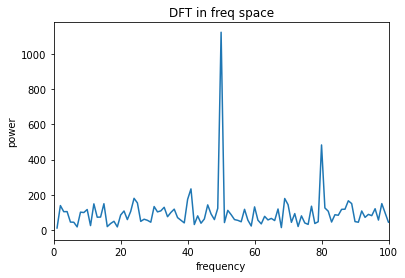

In [84]:
# fourier transform

ft = fft(signal)
xf = fftfreq(1000, 0.001) 

plt.xlim(0,100)
plt.title("DFT in freq space")
plt.plot(xf[xf>0],np.abs(ft[xf>0]))
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()


# questions:-
# the blue line at the base??

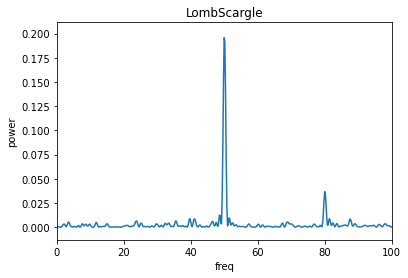

In [81]:
#lomb scargle

frequency1, power1 = LombScargle(t, signal).autopower()
plt.title("LombScargle")
plt.xlim(0,100)
plt.plot(frequency1,power1)
plt.xlabel("freq")
plt.ylabel("power")
plt.show()

# 2) same freq, diff amp (FT and LS)

In [12]:
t = np.arange(0,1,0.001)                                        
y2 = 3*np.sin(2*np.pi*50*t) + np.sin(2*np.pi*50*t)              
#plt.plot(t,y2)

In [13]:
noise = np.random.normal(0,3,1000)
signal2 = y2 + noise
#plt.plot(t,signal2)

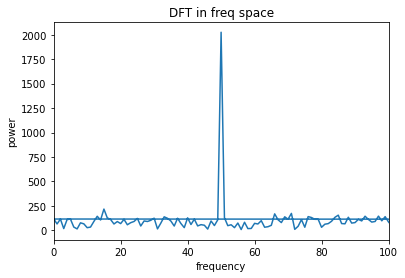

In [14]:
# FT

ft = fft(signal2)
xf = fftfreq(1000, 0.001)   

plt.xlim(0,100)
plt.title("DFT in freq space")
plt.plot(xf,np.abs(ft))
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()

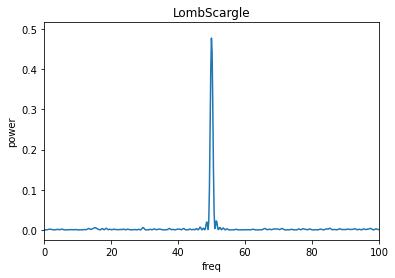

In [15]:
# LS

frequency2, power2 = LombScargle(t, signal2).autopower()
plt.title("LombScargle")
plt.xlim(0,100)
plt.plot(frequency2,power2)
plt.xlabel("freq")
plt.ylabel("power")
plt.show()

In [16]:
# freq of 50 but diff amp of 1 and 3
# amps add up -----> not sure (in y axis :- power is above 0.4)

# 3) diff freq, same amp (FT and LS)

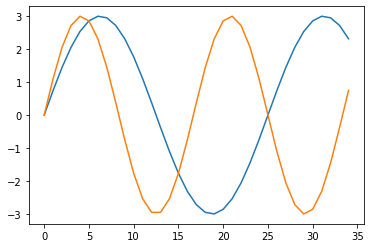

In [89]:
t = np.arange(0,1,0.001)                                        
y3 = 3*np.sin(2*np.pi*40*t) + 3*np.sin(2*np.pi*60*t)              
#plt.plot(t,y3)
plt.plot(3*np.sin(2*np.pi*40*t)[0:35])
plt.plot(3*np.sin(2*np.pi*60*t)[0:35])

In [18]:
noise = np.random.normal(0,5,1000)
signal3 = y3 + noise
#plt.plot(t,signal3)

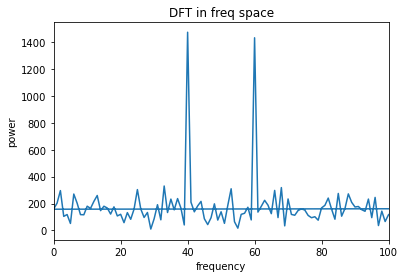

In [19]:
#FT

ft = fft(signal3)
xf = fftfreq(1000, 0.001)   

plt.xlim(0,100)
plt.title("DFT in freq space")
plt.plot(xf,np.abs(ft))
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()

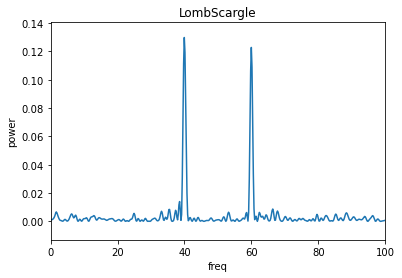

In [20]:
#LS
frequency3, power3 = LombScargle(t, signal3).autopower()
plt.title("LombScargle")
plt.xlim(0,100)
plt.plot(frequency3,power3)
plt.xlabel("freq")
plt.ylabel("power")
plt.show()

In [21]:
# diff freq of 40 and 60 does show two diff peaks of same height
# noise (3) ---> works good
# noise (5) ---> peak(40) > peak(60) 
# noise (6) ---> peak(40) > peak(60) ...... why? even though they have same amp in wave formation

# 4) create uneven sample and do FT and LS (either use random or remove some part of waves)

In [22]:
#random example to use sample function
import random 

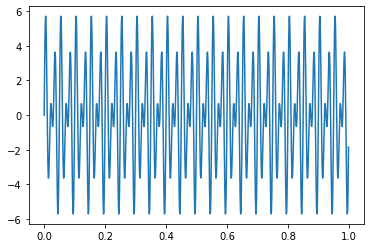

In [23]:
#wave

t = np.arange(0,1,0.001)                                        
y3 = 3*np.sin(2*np.pi*40*t) + 3*np.sin(2*np.pi*60*t)              
plt.plot(t,y3)

In [24]:
#picking random values from the wave

x_pick = random.choices(t, k =200)
#print(x_pick)

y_pick = random.choices(y3, k = 200)     #choose random values from the list, could be repeated
#print(y_pick)

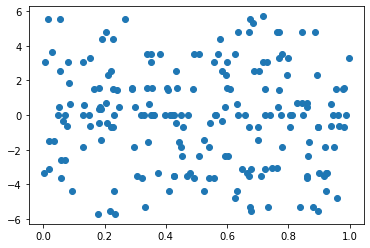

In [25]:
plt.scatter(x_pick,y_pick)    #still its evenly space data

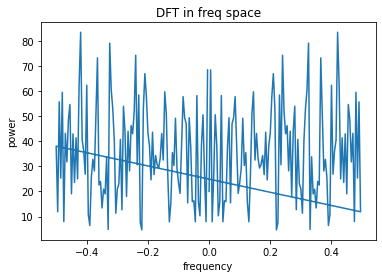

In [26]:
#FT

ft = fft(y_pick)
xf = fftfreq(200, 1)   

#plt.xlim(0,100)
plt.title("DFT in freq space")
plt.plot(xf,np.abs(ft))
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()

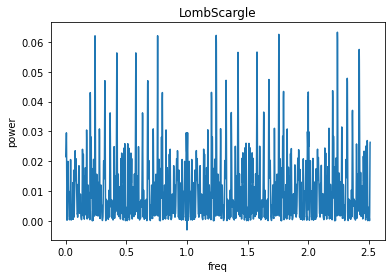

In [27]:
#LS

x = np.arange(0,200,1)

frequency4, power4 = LombScargle(x, y_pick).autopower()
plt.title("LombScargle")
#plt.xlim(0,100)
plt.plot(frequency4,power4)
plt.xlabel("freq")
plt.ylabel("power")
plt.show()

In [28]:
#not working

1000
1000


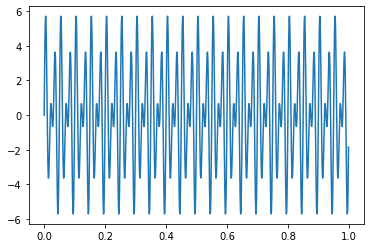

In [29]:
t = np.arange(0,1,0.001)                                        
y3 = 3*np.sin(2*np.pi*40*t) + 3*np.sin(2*np.pi*60*t)              
plt.plot(t,y3)


print(len(t))
print(len(y3))

In [30]:
x = np.delete(t,[2,7,89,3,4,5,6,36,72,77])         
y = np.delete(y3,[2,7,89,3,4,5,6,36,72,77])
print(len(x))
print(len(y))

990
990


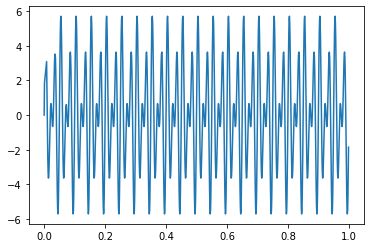

In [31]:
plt.plot(x,y)    #not working

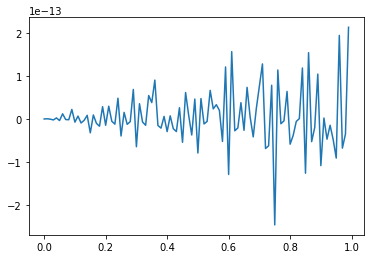

In [63]:
#another try

n = np.arange(0,1,0.01)
#print(len(n))
y3 = 3*np.sin(2*np.pi*40*n) + 3*np.sin(2*np.pi*60*n)  
plt.plot(n,y3)

In [64]:
n[3] = 0
n[10] = 0
n[11] = 0
n[12] = 0
n[55] = 0
n[79] = 0
n[62] = 0
n[66] = 0
n[53] = 0
n[88] = 0
n[92] = 0
n[41] = 0
n[30] = 0
n[39] = 0
n[11] = 0
n[82] = 0
n[54] = 0
n[91] = 0
n[17] = 0
n[47] = 0

In [65]:
y3[3] = 0
y3[10] = 0
y3[11] = 0
y3[12] = 0
y3[55] = 0
y3[79] = 0
y3[62] = 0
y3[66] = 0
y3[53] = 0
y3[88] = 0
y3[92] = 0
y3[41] = 0
y3[30] = 0
y3[39] = 0
y3[11] = 0
y3[82] = 0
y3[54] = 0
y3[91] = 0
y3[17] = 0
y3[47] = 0

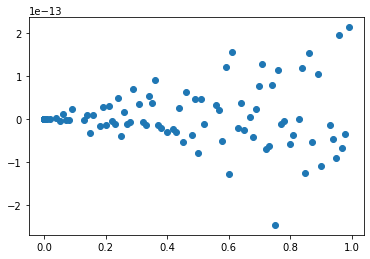

In [66]:
plt.scatter(n,y3)

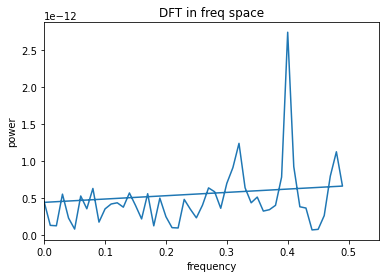

In [67]:
#FT

ft = fft(y3)
xf = fftfreq(100, 1)   

#plt.xlim(0,100)
plt.title("DFT in freq space")
plt.plot(xf,np.abs(ft))
plt.xlabel("frequency")
plt.ylabel("power")
plt.xlim(0,0.55)
plt.show()

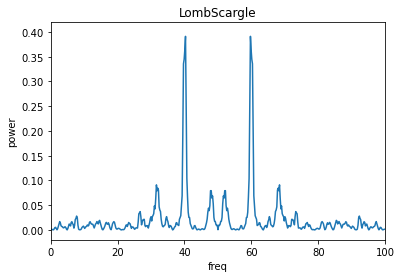

In [68]:
#LS

x = np.arange(0,100,1)

frequency4, power4 = LombScargle(n, y3).autopower()
plt.title("LombScargle")
plt.xlim(0,100)
plt.plot(frequency4,power4)
plt.xlabel("freq")
plt.ylabel("power")
plt.show()

# 5) form gaussian and add sine wave and then apply both FT and LS

1000


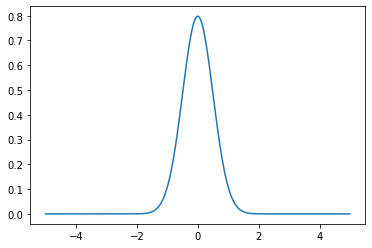

In [38]:
# forming a gaussian

from scipy.stats import norm

x_values = np.arange(-5,5,0.01)     #100  {10/0.1=100}
#print(len(x_values))               #1000
y_values = scipy.stats.norm(0,0.5)   # mean, std deviation
plt.plot(x_values,y_values.pdf(x_values))   # probability density function of normal distribution


print(len(y_values.pdf(x_values)))  # no. of values = 100
#print(y_values.pdf(x_values))  #gives values

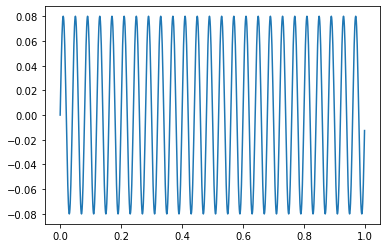

In [39]:
#sine wave

t = np.arange(0,1,0.001)
y5 = 0.08*np.sin(2*np.pi*25*t) 
plt.plot(t,y5)

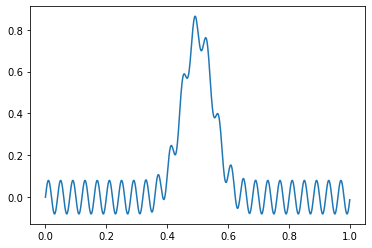

In [40]:
#gaussian + sine wave

s = y5 + y_values.pdf(x_values)

plt.plot(t,s)
plt.show()

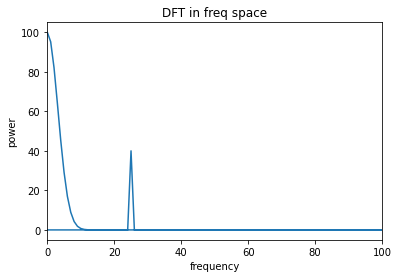

In [41]:
# FT
ft = fft(s)
xf = fftfreq(1000, 0.001)   

plt.xlim(0,100)
plt.title("DFT in freq space")
plt.plot(xf,np.abs(ft))
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()

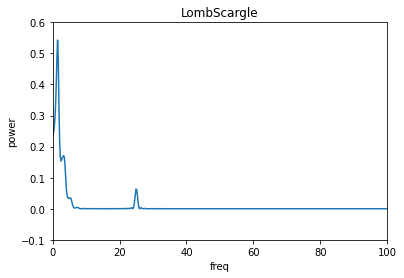

In [42]:
#LS

frequency5, power5 = LombScargle(t, s).autopower()
plt.title("LombScargle")
plt.xlim(0,100)
plt.plot(frequency5,power5)
plt.xlabel("freq")
plt.ylabel("power")
plt.ylim(-0.1,0.6)
plt.show()

In [43]:
#why sudden peak at the start?

# 6) form gaussian and add sine wave  + noise and then apply both FT and LS

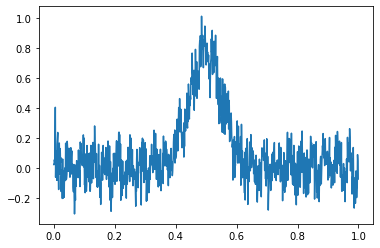

In [44]:
noise = np.random.normal(0,0.1,1000)
s_new = s + noise

plt.plot(t,s_new)

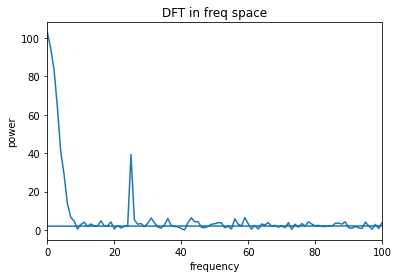

In [45]:
# FT
ft = fft(s_new)
xf = fftfreq(1000, 0.001)   

plt.xlim(0,100)
plt.title("DFT in freq space")
plt.plot(xf,np.abs(ft))
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()

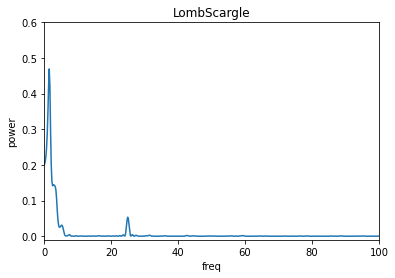

In [46]:
#LS

frequency5, power5 = LombScargle(t, s_new).autopower()
plt.title("LombScargle")
plt.xlim(0,100)
plt.plot(frequency5,power5)
plt.xlabel("freq")
plt.ylabel("power")
plt.ylim(-0.01,0.6)
plt.show()

In [47]:
# LS deals with noise better than FT